In [1]:
# import modules, set up paths
import os
import numpy as np
import random as rand
from collections import Counter
import matplotlib.pylab as plt

base_path = "/Users/juliahopkins/Desktop/classes/neusci 403/" # won't run unless you download the wordlist.txt file and change to your path
filename = "wordlist.txt"
guesses_to_file = os.path.join(base_path, filename)

filename = "secrets.txt"
ans_to_file = os.path.join(base_path, filename)

In [2]:
# calculate frequency of each letter in the ANSWERS wordlist3
with open(ans_to_file) as text:
    file = text.read()
    
c=Counter(file)
del c['\n']
c.most_common()

# most common are e,a,r,o,t; based on this, 'orate' is the best starting word
    # implement location probability to find actual best word- probably "later" or something similar
    

[('e', 1233),
 ('a', 979),
 ('r', 899),
 ('o', 754),
 ('t', 729),
 ('l', 719),
 ('i', 671),
 ('s', 669),
 ('n', 575),
 ('c', 477),
 ('u', 467),
 ('y', 425),
 ('d', 393),
 ('h', 389),
 ('p', 367),
 ('m', 316),
 ('g', 311),
 ('b', 281),
 ('f', 230),
 ('k', 210),
 ('w', 195),
 ('v', 153),
 ('z', 40),
 ('x', 37),
 ('q', 29),
 ('j', 27)]

In [3]:
# open file to read words rather than single letters
with open(ans_to_file) as text:
    anslist = text.readlines()

with open(guesses_to_file) as text:
    guesslist = text.readlines()

In [4]:
# count how many times each letter occurs in each position
# first convert answerlist from vector of words to matrix of letters, where columns are positions and rows are the words

answerlist=np.zeros((len(anslist),5),dtype=str)

for i in range(0,len(anslist)):
    word=anslist[i]
    letters = [word[0],word[1],word[2],word[3],word[4]]
    answerlist[i,:]=letters

# same for guesslist for use later
    guesseslist=np.zeros((len(guesslist),5),dtype=str)

for i in range(0,len(guesslist)):
    word=guesslist[i]
    letters = [word[0],word[1],word[2],word[3],word[4]]
    guesseslist[i,:]=letters
    
# for loop running through each letter of the alphabet and each position, store counts in a 5x26 table

alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
posCounts=np.zeros((5,26))

for pos in np.arange(0,5):
    c=Counter(answerlist[:,pos])
    
    for let in np.arange(0,26):
        letter=alphabet[let]
        
        count=c[letter]
        posCounts[pos,let]=count
        
print(posCounts)

[[141. 173. 198. 111.  72. 136. 115.  69.  34.  20.  20.  88. 107.  37.
   41. 142.  23. 105. 366. 149.  33.  43.  83.   0.   6.   3.]
 [304.  16.  40.  20. 242.   8.  12. 144. 202.   2.  10. 201.  38.  87.
  279.  61.   5. 267.  16.  77. 186.  15.  44.  14.  23.   2.]
 [307.  57.  56.  75. 177.  25.  67.   9. 266.   3.  12. 112.  61. 139.
  244.  58.   1. 163.  80. 111. 165.  49.  26.  12.  29.  11.]
 [163.  24. 152.  69. 318.  35.  76.  28. 158.   2.  55. 162.  68. 182.
  132.  50.   0. 152. 171. 139.  82.  46.  25.   3.   3.  20.]
 [ 64.  11.  31. 118. 424.  26.  41. 139.  11.   0. 113. 156.  42. 130.
   58.  56.   0. 212.  36. 253.   1.   0.  17.   8. 364.   4.]]


In [5]:
# finding the best starting word: score each word in the ans list based on the sum of its letters' positional counts in the answer list:

WordScores=np.zeros(len(answerlist))

for i in range(0,len(answerlist)):
    word=answerlist[i,:]
    wordscore=np.zeros(5)
    
    for p in np.arange(0,5):
        letter=word[p]
        
        if letter=='a': # there's definitely a better way to do this but whatever
            alphpos=0
        elif letter=='b':
            alphpos=1
        elif letter=='c':
            alphpos=2
        elif letter=='d':
            alphpos=3
        elif letter=='e':
            alphpos=4
        elif letter=='f':
            alphpos=5
        elif letter=='g':
            alphpos=6
        elif letter=='h':
            alphpos=7
        elif letter=='i':
            alphpos=8
        elif letter=='j':
            alphpos=9
        elif letter=='k':
            alphpos=10
        elif letter=='l':
            alphpos=11
        elif letter=='m':
            alphpos=12
        elif letter=='n':
            alphpos=13
        elif letter=='o':
            alphpos=14
        elif letter=='p':
            alphpos=15
        elif letter=='q':
            alphpos=16
        elif letter=='r':
            alphpos=17
        elif letter=='s':
            alphpos=18
        elif letter=='t':
            alphpos=19
        elif letter=='u':
            alphpos=20
        elif letter=='v':
            alphpos=21
        elif letter=='w':
            alphpos=22
        elif letter=='x':
            alphpos=23
        elif letter=='y':
            alphpos=24
        else:
            alphpos=25
            
        posscore=posCounts[p,alphpos]
        wordscore[p]=posscore
        
    WordScore=np.sum(wordscore)
    WordScores[i]=WordScore

# what word has the highest score?
print(np.max(WordScores))
maxidx=np.where(WordScores==np.max(WordScores))
maxidx=maxidx[0]
maxidx=int(maxidx)
print(maxidx)
print(anslist[maxidx])

1437.0
1777
slate



In [6]:
# score each word in the GUESS list based on the sum of its letters' positional counts in the answer list:
# want this to be a function to 

def posProbScores(guesslist):
    
    WordScores=np.zeros(len(guesslist))

    for i in range(0,len(guesslist)):
        word=guesslist[i]
        word=convert_str(word)
        wordscore=np.zeros(5)

        for p in np.arange(0,5):
            letter=word[p]

            if letter=='a': # there's definitely a better way to do this but whatever
                alphpos=0
            elif letter=='b':
                alphpos=1
            elif letter=='c':
                alphpos=2
            elif letter=='d':
                alphpos=3
            elif letter=='e':
                alphpos=4
            elif letter=='f':
                alphpos=5
            elif letter=='g':
                alphpos=6
            elif letter=='h':
                alphpos=7
            elif letter=='i':
                alphpos=8
            elif letter=='j':
                alphpos=9
            elif letter=='k':
                alphpos=10
            elif letter=='l':
                alphpos=11
            elif letter=='m':
                alphpos=12
            elif letter=='n':
                alphpos=13
            elif letter=='o':
                alphpos=14
            elif letter=='p':
                alphpos=15
            elif letter=='q':
                alphpos=16
            elif letter=='r':
                alphpos=17
            elif letter=='s':
                alphpos=18
            elif letter=='t':
                alphpos=19
            elif letter=='u':
                alphpos=20
            elif letter=='v':
                alphpos=21
            elif letter=='w':
                alphpos=22
            elif letter=='x':
                alphpos=23
            elif letter=='y':
                alphpos=24
            else:
                alphpos=25

            posscore=posCounts[p,alphpos]
            wordscore[p]=posscore

        WordScore=np.sum(wordscore)
        WordScores[i]=WordScore
        
    return WordScores


In [7]:
# now to get the computer to pick a random answer  
def convert_str(word):
    word=[word[0],word[1],word[2],word[3],word[4]]
    return word
    
ans=rand.choice(anslist)
print(ans)
ans=convert_str(ans)

tamer



In [8]:
# random attempt
#guess = rand.choice(wordlist)
#print(guess)
#guess = convert_str(guess)

In [9]:
# visual word check
def check_guess(guess):
    for i in np.arange(0,5):
        
        if ans[i]==guess[i]:
            print('\033[92m', guess[i])

        elif guess[i] in ans:
            print('\033[93m', guess[i])

        else:
            print('\033[97m', guess[i])

#check_guess(guess)

In [10]:
# word check that computer can understand
def score_word(ans, guess):
    score = [-1, -1, -1, -1, -1]
    for i, w in enumerate(guess):
        if w in ans:
            if w == ans[i]:
                score[i] = 1
            else:
                score[i] = 0
    return score

#score=score_word(ans,guess)
#print(score)

In [11]:
# remove ineligible words
def remove_words(score, guess, guesslist):
    to_remove = []
    for i, word in enumerate(guesslist):
        for s, w1, w2 in zip(score, word, guess):
            if s == 1:
                if w1 != w2:
                    to_remove.append(word)
                    break
            elif s == -1:
                if w2 in word:
                    to_remove.append(word)
                    break
            elif s == 0:
                if w1 == w2:
                    to_remove.append(word)
                    break
                elif w2 not in word:
                    to_remove.append(word)
                    break
    guesslist = list(set(guesslist) - set(to_remove))
    return guesslist

In [12]:
#remove_words(score,guess,wordlist)

In [13]:
# all together:

def wordle(guesslist):
    tries = 1
    score = [-1, -1, -1, -1, -1]
    
    for i in np.arange(0,20):
        
        guess = np.random.choice(guesslist)
        score = score_word(ans, guess)
        
        if score != [1, 1, 1, 1, 1]:
            tries += 1
            guesslist = remove_words(score, guess, guesslist)
            
        elif score == [1, 1, 1, 1, 1]:
            guesslist = remove_words(score, guess, guesslist)
            return tries, guesslist
            break
                

In [14]:
# play wordle 600x with completely random guessing schema:

tries_rand=np.zeros(600)

for i in np.arange(0,600):
    
    ans=rand.choice(anslist)
    ans=convert_str(ans)

    [numtry, answer]=wordle(guesslist)

    tries_rand[i]=numtry


In [15]:
# now with orate as the first guess:

def wordle(guesslist):
    tries = 1
    score = [-1, -1, -1, -1, -1]
    
    for i in np.arange(0,20):
        
        if i==0:
            guess="orate"
        else:
            guess = np.random.choice(guesslist)
        
        score = score_word(ans, guess)
        
        if score != [1, 1, 1, 1, 1]:
            tries += 1
            guesslist = remove_words(score, guess, guesslist)
            
        elif score == [1, 1, 1, 1, 1]:
            guesslist = remove_words(score, guess, guesslist)
            return tries, guesslist
            break

4.785


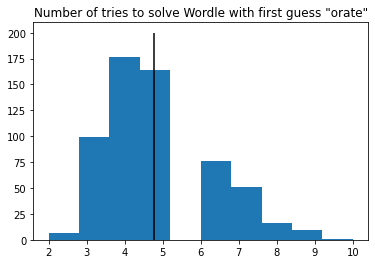

In [16]:
tries=np.zeros(600)
for i in np.arange(0,600):
    
    ans=rand.choice(anslist)
    ans=convert_str(ans)

    [numtry, answer]=wordle(guesslist)

    tries[i]=numtry


plt.hist(tries)
plt.vlines(np.mean(tries),0,200,color='black',label='Mean')
plt.title('Number of tries to solve Wordle with first guess "orate"')
print(np.mean(tries))

In [17]:
# now with slate as the first guess:

def wordle(guesslist):
    tries = 1
    score = [-1, -1, -1, -1, -1]
    
    for i in np.arange(0,20):
        
        if i==0:
            guess="slate"
        else:
            guess = np.random.choice(guesslist)
        
        score = score_word(ans, guess)
        
        if score != [1, 1, 1, 1, 1]:
            tries += 1
            guesslist = remove_words(score, guess, guesslist)
            
        elif score == [1, 1, 1, 1, 1]:
            guesslist = remove_words(score, guess, guesslist)
            return tries, guesslist
            break

4.841666666666667


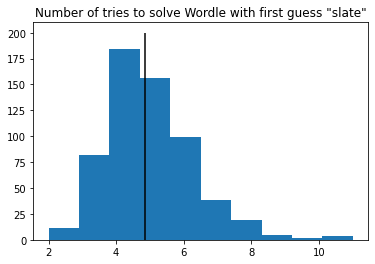

In [18]:
for i in np.arange(0,600):
    
    ans=rand.choice(anslist)
    ans=convert_str(ans)

    [numtry, answer]=wordle(guesslist)

    tries[i]=numtry


plt.hist(tries)
plt.vlines(np.mean(tries),0,200,color='black',label='Mean')
plt.title('Number of tries to solve Wordle with first guess "slate"')
print(np.mean(tries))

In [19]:
# implement with posProbScores(guesslist)

def wordle_posProb(guesslist):
    tries = 1
    score = [-1, -1, -1, -1, -1]

    for i in np.arange(0,20):

        if i==0:
            guess="slate"
        else:
            WordScores = posProbScores(guesslist)

            # what words have the highest score?
            maxidx=np.where(WordScores==np.max(WordScores))
            maxidx=maxidx[0]
            maxidx=rand.choice(maxidx)

            # choose one of highest-scoring words
            guess = guesslist[maxidx]

        score = score_word(ans, guess)

        if score != [1, 1, 1, 1, 1]:
            tries += 1
            guesslist = remove_words(score, guess, guesslist)

        elif score == [1, 1, 1, 1, 1]:
            guesslist = remove_words(score, guess, guesslist)
            return tries, guesslist
            break
                  

In [20]:
tries_posprob=np.zeros(600)
for i in np.arange(0,600):
    
    ans=rand.choice(anslist)
    ans=convert_str(ans)

    [numtry, answer]=wordle_posProb(guesslist)

    tries_posprob[i]=numtry

4.915
4.581666666666667


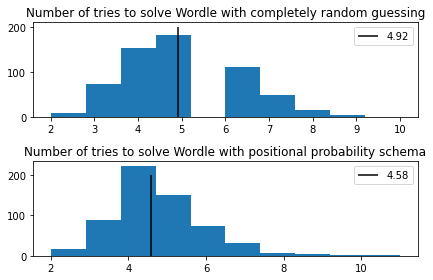

In [21]:
plt.subplot(211)
plt.hist(tries_rand)
plt.vlines(np.mean(tries_rand),0,200,color='black',label=np.round(np.mean(tries_rand),2))
plt.title('Number of tries to solve Wordle with completely random guessing')
print(np.mean(tries_rand))
plt.legend()
  
plt.subplot(212)
plt.hist(tries_posprob)
plt.vlines(np.mean(tries_posprob),0,200,color='black',label=np.round(np.mean(tries_posprob),2))
plt.title('Number of tries to solve Wordle with positional probability schema')
print(np.mean(tries_posprob))
plt.tight_layout()
plt.legend()